Stock Prize Prediction using LSTM

In [ ]:
import pandas as pd

df = pd.read_csv('./content/GOOG.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [ ]:
df.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

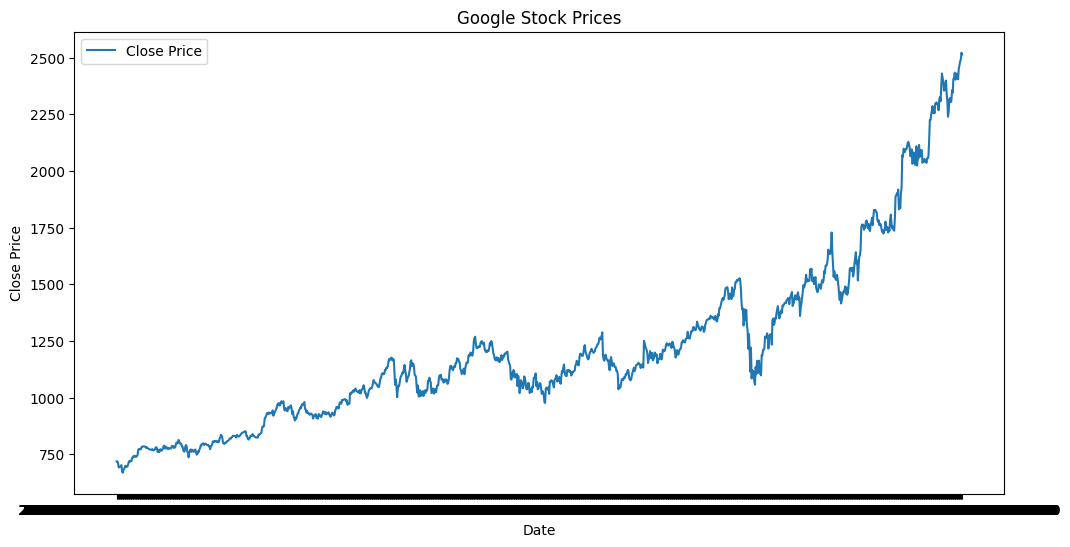

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google Stock Prices')
plt.legend()
plt.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

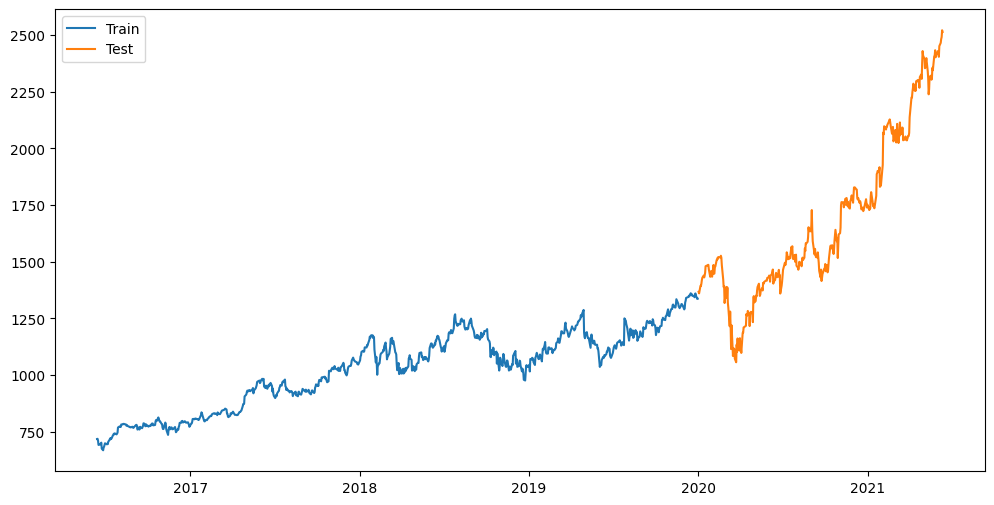

In [ ]:
split_date = '2020-01-01'
train = df[df.index < split_date]
test = df[df.index >= split_date]

plt.figure(figsize=(12, 6))
plt.plot(train['close'], label='Train')
plt.plot(test['close'], label='Test')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['close'].values.reshape(-1, 1))

In [ ]:
import numpy as np

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
train_data = scaled_data[0:int(len(train))]
test_data = scaled_data[int(len(train)):]

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, batch_size=1, epochs=1)

793/793 [==============================] - 58s 67ms/step - loss: 8.5622e-04


In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

9/9 [==============================] - 0s 33ms/step


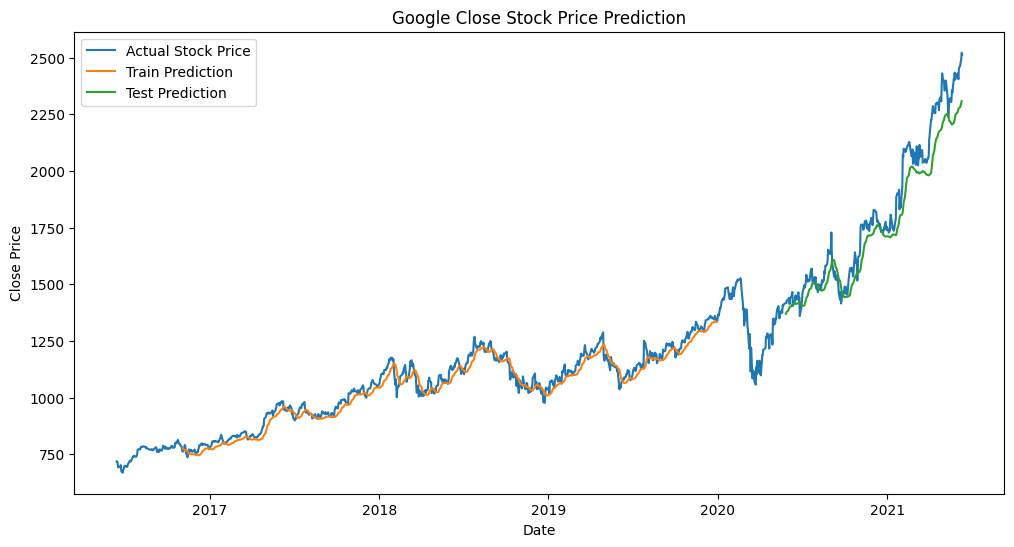

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Actual Stock Price')
plt.plot(df.index[time_step:len(train_predict) + time_step], train_predict, label='Train Prediction')
plt.plot(df.index[len(train_predict) + (time_step * 2) + 1:len(df) - 1], test_predict, label='Test Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google Close Stock Price Prediction')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

train_score = mean_squared_error(y_train, train_predict)
test_score = mean_squared_error(y_test, test_predict)
print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 1106244.007343654
Test Score: 3114095.507842857


In [ ]:
mse = mean_squared_error(y_test, test_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_predict)
r2 = r2_score(y_test, test_predict)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')


MSE: 3114095.507842857
RMSE: 1764.6800015421654
MAE: 1742.0034225426339
R²: -100883639.28978917
